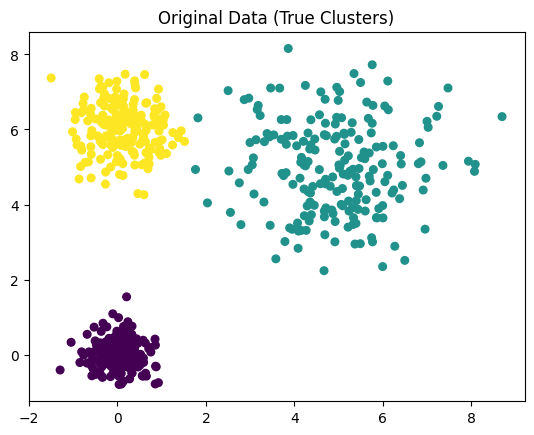

C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_4064\185761606.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],


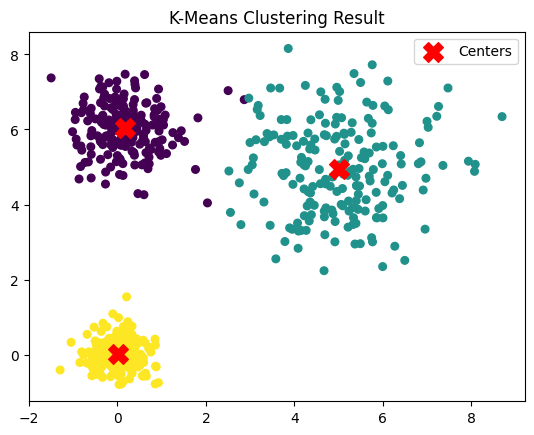

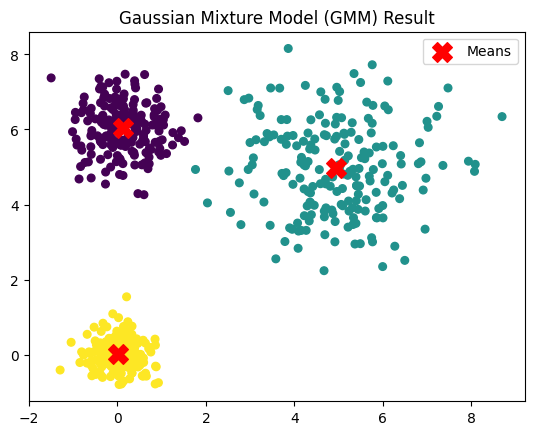

K-Means ARI: 0.9752324006948598
GMM ARI: 0.9949958125176231


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix

X, y_true = make_blobs(n_samples=600, centers=[(0,0),(5,5),(0,6)],
                       cluster_std=[0.4,1.2,0.6], random_state=42)

# transformation = [[0.7, -0.5], [0.3, 0.9]]
# X = np.dot(X, transformation)

plt.scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=30)
plt.title("Original Data (True Clusters)")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_kmeans[:], cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200,cmap='viridis', label='Centers')
plt.title("K-Means Clustering Result")
plt.legend(); plt.show()

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_gmm[:], cmap='viridis', s=30)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1],
            c='red', marker='X', s=200, label='Means')
plt.title("Gaussian Mixture Model (GMM) Result")
plt.legend(); plt.show()

print("K-Means ARI:", adjusted_rand_score(y_true, labels_kmeans))
print("GMM ARI:", adjusted_rand_score(y_true, labels_gmm))


   Feature1  Feature2  TrueCluster
0  0.064257 -0.040285            0
1  1.891200  5.704236            2
2  0.021985  0.916904            0
3  2.206618  5.394007            2
4  5.140636  3.198675            1
5 -0.200979  0.252171            0
6  5.114147  3.468656            1
7  1.612394  4.520621            2
8  2.418802  6.192655            2
9  2.254651  5.406648            2


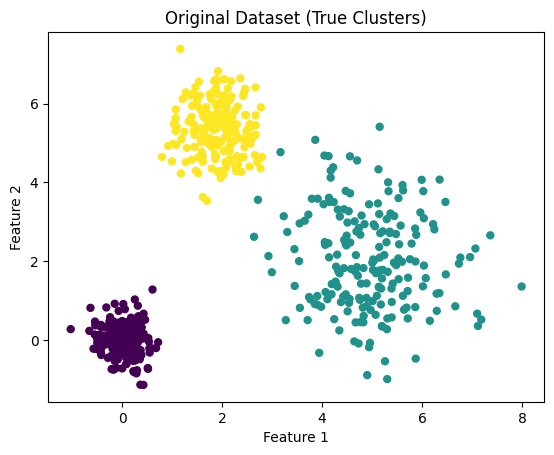

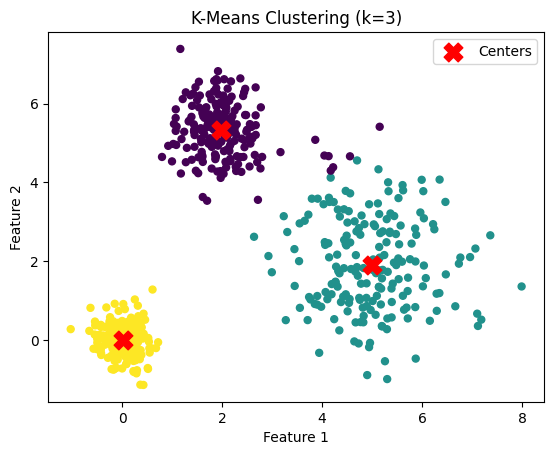

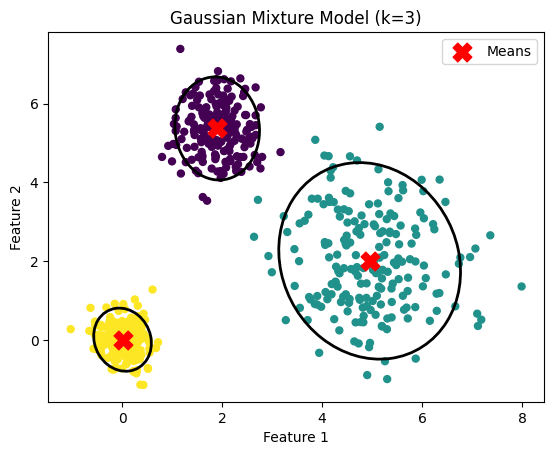


Adjusted Rand Index (higher is better)
K-Means: 0.956
GMM    : 0.995

Confusion Matrix — K-Means
 [[  0   0 200]
 [  9 191   0]
 [200   0   0]]

Confusion Matrix — GMM
 [[  0   0 200]
 [  1 199   0]
 [200   0   0]]

Observation: GMM handles overlaps better.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from matplotlib.patches import Ellipse

# 1) Data: overlapping, slightly elliptical clusters
X, y_true = make_blobs(n_samples=600,
                       centers=[(0,0),(5,5),(0,6)],
                       cluster_std=[0.4,1.2,0.6],
                       random_state=42)
X = X @ np.array([[0.7, -0.5],[0.3, 0.9]])  # make clusters elliptical

df = pd.DataFrame(X, columns=["Feature1","Feature2"]); 
df["TrueCluster"]=y_true
print(df.head(10))

# 2) Ground-truth view
plt.scatter(X[:,0], X[:,1], c=y_true, cmap="viridis", s=25)
plt.title("Original Dataset (True Clusters)")
plt.xlabel("Feature 1"); 
plt.ylabel("Feature 2")
plt.show()

# 3) K-Means (k=3)
kmeans = KMeans(n_clusters=3, n_init="auto", random_state=42)
labels_km = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_km, cmap="viridis", s=25)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="red", marker="X", s=180, label="Centers")
plt.title("K-Means Clustering (k=3)")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2"); plt.legend()
plt.show()

# 4) GMM (k=3)
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=42)
labels_gmm = gmm.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels_gmm, cmap="viridis", s=25)
ax.scatter(gmm.means_[:,0], gmm.means_[:,1],
           c="red", marker="X", s=180, label="Means")

# covariance ellipses for GMM
def draw_ellipse(mean, cov, ax, nsig=2):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:,order]
    width, height = 2*nsig*np.sqrt(vals)
    angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    ell = Ellipse(xy=mean, width=width, height=height, angle=angle,
                  fill=False, lw=2)
    ax.add_patch(ell)

for m, c in zip(gmm.means_, gmm.covariances_):
    draw_ellipse(m, c, ax)

ax.set_title("Gaussian Mixture Model (k=3)")
ax.set_xlabel("Feature 1"); ax.set_ylabel("Feature 2"); ax.legend()
plt.show()

# 5) Comparison: ARI + confusion matrices
ari_km  = adjusted_rand_score(y_true, labels_km)
ari_gmm = adjusted_rand_score(y_true, labels_gmm)

print("\nAdjusted Rand Index (higher is better)")
print(f"K-Means: {ari_km:.3f}")
print(f"GMM    : {ari_gmm:.3f}")

print("\nConfusion Matrix — K-Means\n", confusion_matrix(y_true, labels_km))
print("\nConfusion Matrix — GMM\n", confusion_matrix(y_true, labels_gmm))

print("\nObservation:", "GMM handles overlaps better."
      if ari_gmm > ari_km else "K-Means performed similarly or better here.")


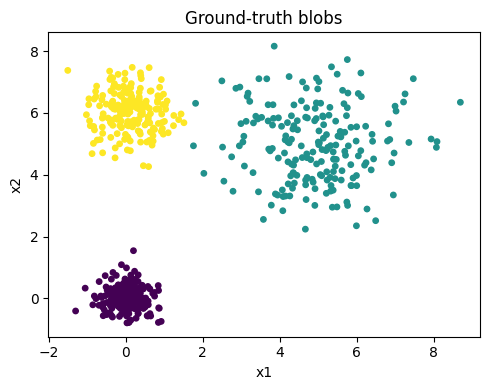

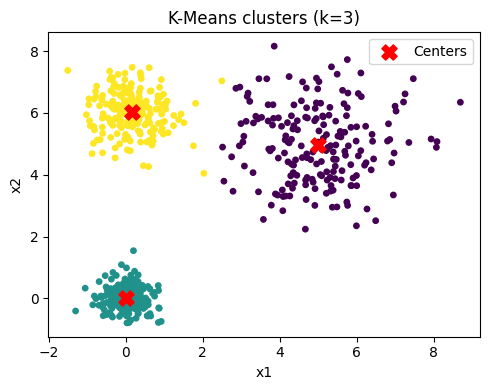

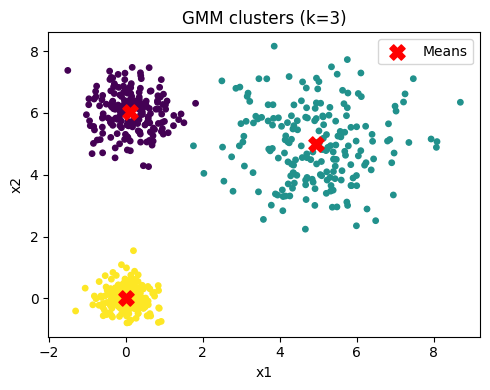

Adjusted Rand Index - KMeans: 0.980
Adjusted Rand Index - GMM   : 0.995


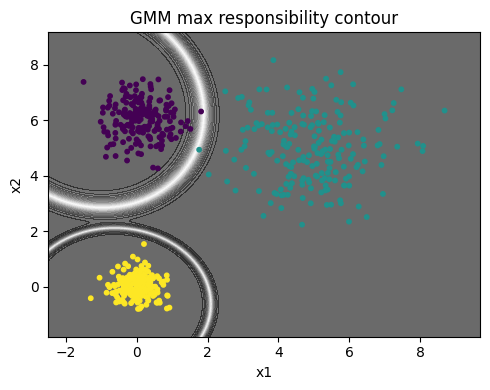

In [1]:
# K-Means vs. Gaussian Mixture (Clustering) on synthetic blobs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# 1) Make synthetic data: 3 Gaussian blobs with moderate overlap
#    Centers and stds can be tuned to create more or less overlap.
X, y_true = make_blobs(
    n_samples=600,
    centers=[[0, 0], [5, 5], [0, 6]],
    cluster_std=[0.4, 1.2, 0.6],
    random_state=42
)

# Optional: visualize raw data colored by ground truth
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=15)
plt.title('Ground-truth blobs')
plt.xlabel('x1'); plt.ylabel('x2'); plt.tight_layout()
plt.show()

# 2) K-Means (k=3)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_km = kmeans.fit_predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=labels_km, cmap='viridis', s=15)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=120, label='Centers')
plt.title('K-Means clusters (k=3)')
plt.legend()
plt.xlabel('x1'); plt.ylabel('x2'); plt.tight_layout()
plt.show()

# 3) Gaussian Mixture (k=3), full covariance
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=labels_gmm, cmap='viridis', s=15)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1],
            c='red', marker='X', s=120, label='Means')
plt.title('GMM clusters (k=3)')
plt.legend()
plt.xlabel('x1'); plt.ylabel('x2'); plt.tight_layout()
plt.show()

# 4) Evaluation with ARI (higher is better, 1.0 is perfect)
ari_km = adjusted_rand_score(y_true, labels_km)
ari_gmm = adjusted_rand_score(y_true, labels_gmm)
print(f"Adjusted Rand Index - KMeans: {ari_km:.3f}")
print(f"Adjusted Rand Index - GMM   : {ari_gmm:.3f}")

# 5) Optional: probability contours for GMM to illustrate soft assignments
from matplotlib.colors import ListedColormap
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = gmm.predict_proba(grid)
Z = probs.max(axis=1).reshape(xx.shape)

plt.figure(figsize=(5,4))
plt.contourf(xx, yy, Z, levels=20, cmap='Greys', alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=labels_gmm, cmap='viridis', s=10)
plt.title('GMM max responsibility contour')
plt.xlabel('x1'); plt.ylabel('x2'); plt.tight_layout()
plt.show()
